# Fuzzy C-Mean Clustering
----
## Konsep dasar Fuzzy C-Mean Clustering

Fuzzy C-Means (FCM) adalah salah satu teknik clustering yang menggunakan konsep fuzzy dalam pengelompokan data. Berbeda dengan metode K-Means yang memberikan keanggotaan tegas pada setiap data, FCM memungkinkan setiap data memiliki derajat keanggotaan dalam beberapa cluster. Konsep dasar dari FCM adalah bahwa setiap data diberi bobot tertentu terhadap setiap pusat cluster, sehingga pembagian kelompok menjadi lebih fleksibel dan reflektif terhadap ketidakpastian dalam data.





### **Algoritma Fuzzy C-Means (FCM) Clustering**

Algoritma **Fuzzy C-Means** bekerja dengan mengelompokkan data ke dalam klaster berdasarkan degree of membership, bukan secara tegas seperti K-Means. Berikut adalah langkah-langkahnya:

1. Menentukan jumlah klaster \(C\) yang akan dibentuk.
2. Menginisialisasi matriks keanggotaan secara acak, yang menunjukkan derajat keanggotaan setiap titik data terhadap masing-masing klaster.
3. Menghitung pusat klaster berdasarkan bobot keanggotaan setiap titik data.
4. Memperbarui matriks keanggotaan, dengan menghitung seberapa dekat setiap data terhadap pusat klaster yang baru dihitung.
5. Mengulang proses dari langkah 3 hingga konvergen, yaitu ketika perubahan pada pusat klaster atau matriks keanggotaan sudah sangat kecil.

### **Rumus Matematis Algoritma FCM**

Pada FCM, setiap titik data \( x_i \) memiliki _membership degree_ pada setiap klaster \( j \).

1. **Fungsi Keanggotaan**  
   $$
   u_{ij} = \frac{1}{\sum_{k=1}^{C} \left( \frac{||x_i - v_j||}{||x_i - v_k||} \right)^{\frac{2}{m-1}} }
   $$

   Di mana:  
   - $ u_{ij} $ adalah derajat keanggotaan titik data
   $ x_i $ terhadap klaster $ j $.  
   - $ v_j $ adalah pusat klaster $ j $.  
   - $ m $ adalah *fuzzifier exponent*, biasanya $ m > 1 $, yang mengontrol kekaburan batas antar-klaster.  
   - $ ||x_i - v_j|| $ adalah jarak antara titik data dan pusat klaster.  

2. **Perhitungan Pusat Klaster**  
   $$
   v_j = \frac{\sum_{i=1}^{N} u_{ij}^m \cdot x_i}{\sum_{i=1}^{N} u_{ij}^m}
   $$

   Di mana:  
   - $ v_j $ adalah pusat klaster $ j $.  
   - $ N $ adalah jumlah data.  
   - $ u_{ij}^m $ adalah membership degree yang dipangkatkan $ m $.  

3. **Fungsi Objektif yang Diminimalkan**  
   $$
   J = \sum_{i=1}^{N} \sum_{j=1}^{C} u_{ij}^m ||x_i - v_j||^2
   $$

   Algoritma FCM ini akan berusaha meminimalkan nilai  $ J $, sehingga titik data dikelompokkan ke klaster yang paling sesuai dengan tingkat keanggotaan,jika nilai $ J $ sudah minimal maka algoritma sudah konvergen dan iterasi bisa di hentikan, namun jika tidak maka lakukan iterasi lagi.

   kita dapat melihat apakah $ J $ sudah minimal dengan melihat Perbedaan Relatif Antara Iterasi

  Biasanya kita menghitung perbedaan antara nilai
  𝐽
  pada iterasi sebelumnya dan iterasi sekarang: $$ \Delta J = |J^{(t)} - J^{(t-1)}| $$ Jika
  Δ
  𝐽
  lebih kecil dari ambang batas
  𝜖
  yang telah ditentukan, misalnya
  𝜖
  =
  10
  −
  5
  , maka algoritma dianggap konvergen.



## Contoh Manual perhitungan Fuzzy C-Mean Clustering

 Berikut ini adalah **Fuzzy C-Means (FCM)** clustering untuk **2 cluster dan 2 iterasi** menggunakan:

* Data: 5 titik, masing-masing memiliki 2 fitur
* Derajat keanggotaan awal
* Parameter fuzziness $m = 2$ (standar)

---

 Data dan Derajat Keanggotaan Awal

$$
X = \begin{bmatrix}
1 & 2 \\
5 & 3 \\
3 & 4 \\
6 & 7 \\
7 & 7 \\
\end{bmatrix}
$$

$$
U^{(0)} = \begin{bmatrix}
0.3 & 0.7 \\
0.6 & 0.4 \\
0.4 & 0.6 \\
0.7 & 0.3 \\
0.2 & 0.8 \\
\end{bmatrix}
$$

---

### 🔁 Iterasi 1

---

#### **Langkah 1: Hitung Pusat Cluster (Centroid)**

$$
v_j = \frac{\sum_{i=1}^N u_{ij}^m \cdot x_i}{\sum_{i=1}^N u_{ij}^m}
$$

Untuk Cluster 1:

Hitung $u_{i1}^2 \cdot x_i$:

| $u_{i1}$ | $u_{i1}^2$ | $x_i$   | $u_{i1}^2 \cdot x_i$ |
| -------- | ---------- | ------- | -------------------- |
| 0.3      | 0.09       | \[1, 2] | \[0.09, 0.18]        |
| 0.6      | 0.36       | \[5, 3] | \[1.80, 1.08]        |
| 0.4      | 0.16       | \[3, 4] | \[0.48, 0.64]        |
| 0.7      | 0.49       | \[6, 7] | \[2.94, 3.43]        |
| 0.2      | 0.04       | \[7, 7] | \[0.28, 0.28]        |

Jumlah:

$$
\sum u_{i1}^2 = 0.09 + 0.36 + 0.16 + 0.49 + 0.04 = 1.14
$$

$$
\sum u_{i1}^2 \cdot x_i = [5.59, 5.61]
$$

$$
v_1 = \frac{[5.59, 5.61]}{1.14} = [4.9035, 4.9211]
$$

---

 Untuk Cluster 2:

| $u_{i2}$ | $u_{i2}^2$ | $x_i$   | $u_{i2}^2 \cdot x_i$ |
| -------- | ---------- | ------- | -------------------- |
| 0.7      | 0.49       | \[1, 2] | \[0.49, 0.98]        |
| 0.4      | 0.16       | \[5, 3] | \[0.80, 0.48]        |
| 0.6      | 0.36       | \[3, 4] | \[1.08, 1.44]        |
| 0.3      | 0.09       | \[6, 7] | \[0.54, 0.63]        |
| 0.8      | 0.64       | \[7, 7] | \[4.48, 4.48]        |

Jumlah:

$$
\sum u_{i2}^2 = 0.49 + 0.16 + 0.36 + 0.09 + 0.64 = 1.74
$$

$$
\sum u_{i2}^2 \cdot x_i = [7.39, 7.91]
$$

$$
v_2 = \frac{[7.39, 7.91]}{1.74} = [4.2471, 4.5437]
$$

---

#### **Langkah 2: Update Derajat Keanggotaan**

Gunakan rumus:

$$
u_{ij} = \frac{1}{\sum_{k=1}^c \left( \frac{||x_i - v_j||}{||x_i - v_k||} \right)^{\frac{2}{m-1}} }
$$

Gunakan $m = 2 \Rightarrow$ pangkat = 2

---

#### 🔸 Untuk $x_1 = [1,2]$

* $d_1 = \sqrt{(1 - 4.9035)^2 + (2 - 4.9211)^2} = \sqrt{15.23 + 8.53} = \sqrt{23.76} ≈ 4.875$
* $d_2 = \sqrt{(1 - 4.2471)^2 + (2 - 4.5437)^2} = \sqrt{10.55 + 6.47} = \sqrt{17.02} ≈ 4.126$

$$
u_{11} = \frac{1}{1 + \left(\frac{4.875}{4.126}\right)^2} ≈ \frac{1}{1 + 1.394} = 0.4177, \quad u_{12} = 0.5823
$$

---

#### 🔸 Untuk $x_2 = [5,3]$

* $d_1 = \sqrt{(5 - 4.9035)^2 + (3 - 4.9211)^2} = \sqrt{0.0093 + 3.6926} ≈ 1.927$
* $d_2 = \sqrt{(5 - 4.2471)^2 + (3 - 4.5437)^2} ≈ \sqrt{0.566 + 2.383} ≈ 1.697$

$$
u_{21} = \frac{1}{1 + \left(\frac{1.927}{1.697}\right)^2} = \frac{1}{1 + 1.289} = 0.4370, \quad u_{22} = 0.5630
$$

---

#### 🔸 Untuk $x_3 = [3,4]$

* $d_1 = \sqrt{(3 - 4.9035)^2 + (4 - 4.9211)^2} = \sqrt{3.625 + 0.849} ≈ 2.092$
* $d_2 = \sqrt{(3 - 4.2471)^2 + (4 - 4.5437)^2} = \sqrt{1.557 + 0.296} ≈ 1.344$

$$
u_{31} = \frac{1}{1 + \left(\frac{2.092}{1.344}\right)^2} ≈ \frac{1}{1 + 2.424} = 0.2921, \quad u_{32} = 0.7079
$$

---

#### 🔸 Untuk $x_4 = [6,7]$

* $d_1 = \sqrt{(6 - 4.9035)^2 + (7 - 4.9211)^2} ≈ \sqrt{1.199 + 4.322} ≈ 2.34$
* $d_2 = \sqrt{(6 - 4.2471)^2 + (7 - 4.5437)^2} ≈ \sqrt{3.07 + 6.03} ≈ 3.234$

$$
u_{41} = \frac{1}{1 + \left(\frac{2.34}{3.234}\right)^2} ≈ \frac{1}{1 + 0.524} = 0.6562, \quad u_{42} = 0.3438
$$

---

#### 🔸 Untuk $x_5 = [7,7]$

* $d_1 = \sqrt{(7 - 4.9035)^2 + (7 - 4.9211)^2} ≈ \sqrt{4.408 + 4.328} ≈ 2.95$
* $d_2 = \sqrt{(7 - 4.2471)^2 + (7 - 4.5437)^2} ≈ \sqrt{7.58 + 6.04} ≈ 3.565$

$$
u_{51} = \frac{1}{1 + \left(\frac{2.95}{3.565}\right)^2} = \frac{1}{1 + 0.683} = 0.5944, \quad u_{52} = 0.4056
$$

---

#### 🔢 Derajat Keanggotaan Setelah Iterasi 1

$$
U^{(1)} = \begin{bmatrix}
0.4177 & 0.5823 \\
0.4370 & 0.5630 \\
0.2921 & 0.7079 \\
0.6562 & 0.3438 \\
0.5944 & 0.4056 \\
\end{bmatrix}
$$

---

### **Langkah 3: Hitung Fungsi Objektif (Objective Function)**

$$
J = \sum_{i=1}^{N} \sum_{j=1}^{2} u_{ij}^2 \cdot ||x_i - v_j||^2
$$

Gunakan hasil $u_{ij}^2 \cdot d_{ij}^2$ dari semua data.

| Data | $u_{1j}^2 \cdot d^2$                                            | Total |
| ---- | --------------------------------------------------------------- | ----- |
| x1   | $(0.4177)^2 \cdot 23.76 + (0.5823)^2 \cdot 17.02$ ≈ 4.14 + 5.77 | 9.91  |
| x2   | $0.437^2 \cdot 3.70 + 0.563^2 \cdot 2.88$ ≈ 0.708 + 0.911       | 1.619 |
| x3   | $0.2921^2 \cdot 4.47 + 0.7079^2 \cdot 1.80$ ≈ 0.381 + 0.902     | 1.283 |
| x4   | $0.6562^2 \cdot 5.52 + 0.3438^2 \cdot 10.46$ ≈ 2.38 + 1.24      | 3.62  |
| x5   | $0.5944^2 \cdot 8.73 + 0.4056^2 \cdot 12.7$ ≈ 3.08 + 2.09       | 5.17  |

$$
J \approx 9.91 + 1.619 + 1.283 + 3.62 + 5.17 = \boxed{21.60}
$$

---




## Implementasi Python

In [ ]:
import numpy as np

# Data dan derajat keanggotaan awal
data = np.array([
    [1, 2],
    [5, 3],
    [3, 4],
    [6, 7],
    [7, 7]
], dtype=float)

U = np.array([
    [0.3, 0.7],
    [0.6, 0.4],
    [0.4, 0.6],
    [0.7, 0.3],
    [0.2, 0.8]
], dtype=float)

m = 2  # parameter fuzziness
n_clusters = 2
n_iterations = 2
data_labels = [f'X{i+1}' for i in range(len(data))]

def compute_centroids(U, data, m):
    um = U ** m
    centroids = []
    for j in range(n_clusters):
        numerator = np.sum((um[:, j, None]) * data, axis=0)
        denominator = np.sum(um[:, j])
        centroid = numerator / denominator
        centroids.append(centroid)
    return np.array(centroids)

def update_membership(U, data, centroids, m):
    N = data.shape[0]
    new_U = np.zeros((N, n_clusters))
    for i in range(N):
        for j in range(n_clusters):
            numerator = np.linalg.norm(data[i] - centroids[j]) + 1e-10
            denom_sum = 0
            for k in range(n_clusters):
                denominator = np.linalg.norm(data[i] - centroids[k]) + 1e-10
                denom_sum += (numerator / denominator) ** (2 / (m - 1))
            new_U[i, j] = 1 / denom_sum
    return new_U

def compute_objective(U, data, centroids, m):
    J = 0.0
    for i in range(len(data)):
        for j in range(n_clusters):
            dist_sq = np.linalg.norm(data[i] - centroids[j]) ** 2
            J += (U[i, j] ** m) * dist_sq
    return J

# Iterasi FCM
for iteration in range(n_iterations):
    print(f"\n=== Iterasi {iteration + 1} ===")

    # 1. Hitung pusat cluster
    centroids = compute_centroids(U, data, m)
    centroids_df = pd.DataFrame(centroids, columns=["x", "y"], index=[f"C{j+1}" for j in range(n_clusters)])
    print("\nPusat Cluster:")
    print(centroids_df)

    # 2. Update derajat keanggotaan
    U = update_membership(U, data, centroids, m)
    U_df = pd.DataFrame(U, columns=[f"Cluster {j+1}" for j in range(n_clusters)], index=data_labels)
    print("\nDerajat Keanggotaan (U):")
    print(U_df)

    # 3. Hitung fungsi objektif
    J = compute_objective(U, data, centroids, m)
    print(f"\nFungsi Objektif (J): {J:.6f}")



=== Iterasi 1 ===

Pusat Cluster:
           x         y
C1  4.903509  4.921053
C2  4.247126  4.603448

Derajat Keanggotaan (U):
    Cluster 1  Cluster 2
X1   0.421539   0.578461
X2   0.458912   0.541088
X3   0.300333   0.699667
X4   0.614771   0.385229
X5   0.604462   0.395538

Fungsi Objektif (J): 21.726278

=== Iterasi 2 ===

Pusat Cluster:
           x         y
C1  5.178022  5.361879
C2  3.694430  3.966624

Derajat Keanggotaan (U):
    Cluster 1  Cluster 2
X1   0.278987   0.721013
X2   0.319901   0.680099
X3   0.068252   0.931748
X4   0.812091   0.187909
X5   0.770273   0.229727

Fungsi Objektif (J): 17.620044


Kode di atas mengimplementasikan **Fuzzy C-Means Clustering (FCM)** secara manual dengan **dua cluster** Dimulai dengan inisialisasi **data** dan **keanggotaan awal**, di mana setiap titik memiliki derajat keanggotaan terhadap kedua cluster.

berikut nya hitung pusat cluster dengan fungsi **compute_centroid**, setelah centroid di dapatkan,kode ini akan menghitung update matrix keanggotaan terhadap masing masing centroid menggunakan fungsi **update_membership**. terakhir dia akan menghitung fungsi objektif dengan **compute_objective**

kode ini akan melakukan iterasi untuk meminimalkan nilai objektif sampai nilai konvergen atau tidak berubah lagi.



## Implementasi Fuzzy C-Mean Untuk Data Iris (3 Cluster)

In [2]:
%pip install scikit-fuzzy
%pip install fcmeans

%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement fcmeans (from versions: none)
ERROR: No matching distribution found for fcmeans
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


In [4]:

import pymysql
import psycopg2
import numpy as np
import pandas as pd

def get_mysql_data():
    conn = pymysql.connect(
        host="pendatviomysql-39-projectvioo.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_nnGCVuLriFaCit_hSPr",
        database="myiris",
        port=20305
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")  # Select all records from the table
    data = cursor.fetchall()  # Fetch all rows
    conn.close()
    # Convert to Python list
    data_list = [list(row) for row in data]
    # Convert to NumPy array
    data_numpy = np.array(data_list)
    return data_list



def get_pg_data():
    conn = psycopg2.connect(
        host="pg-30810f3a-projectvioo.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_zzD9DhqapmhcWhqwe5C",
        database="defaultdb",
        port=20305
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_post")  # Select all records from the table
    data = cursor.fetchall()  # Fetch all rows
    cursor.close()
    conn.close()

    # Convert to Python list
    data_list = [list(row) for row in data]

    # Convert to NumPy array
    data_numpy = np.array(data_list)

    return data_list

columns = ['id', 'Class', 'sepal_length', 'sepal_width']
data_mysql = pd.DataFrame(get_mysql_data(), columns=columns)

columns = ['id', 'Class', 'petal_length', 'petal_width']
data_pg = pd.DataFrame(get_pg_data(), columns=columns)

df_merged = pd.merge(data_mysql, data_pg, on=["id", "Class"], how="inner")
print(df_merged)




      id           Class  sepal_length  sepal_width  petal_length  petal_width
0      1     Iris-setosa           1.4          0.2           5.1          3.5
1      2     Iris-setosa          14.0          2.0          40.9         30.0
2      3     Iris-setosa           1.3          0.2           4.7          3.2
3      4     Iris-setosa           1.5          0.2           4.6          3.1
4      5     Iris-setosa           1.4          0.2           5.0          3.6
..   ...             ...           ...          ...           ...          ...
145  146  Iris-virginica           5.2          2.3           6.7          3.0
146  147  Iris-virginica           5.0          1.9           6.3          2.5
147  148  Iris-virginica           5.2          2.0           6.5          3.0
148  149  Iris-virginica           5.4          2.3           6.2          3.4
149  150  Iris-virginica           5.1          1.8           5.9          3.0

[150 rows x 6 columns]



### Tahap Preprocessing
Pada tahap preprocessing, dilakukan serangkaian langkah untuk mempersiapkan data sebelum digunakan dalam proses pemodelan.
kali ini saya akan melakukan tahap preprocessing berikut :
1. Pembersihan data
2. Normalisasi data
3. Reduksi dimensi dengan Principal Component Analysys (PCA)





#### Pembersihan data
dalam tahap ini kita akan membersihkan data dari Outlier atau data aneh yang dapat berpengaruh buruk pada kualitas model. Untuk membersihkan data,saya menggunakan LOF (local Outlier Factor) untuk mendeteksi Outlier dan memperbaiki nya menggunakan regresi linear, hal ini di lakukan untuk menghindari ketidakseimbangan data antar kelas bunga Iris dan juga menjaga jumlah data, dan alasan saya menggunakan regresi linear karena relatif sederhana dibandingkan algoritma regresi lain serta lebih akurat dibanding menggunakan rata rata / means.



-----------

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor

# Dataframe awal dengan data kotor dan outlier
datab = df_merged.copy(deep=True)
feature_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Deteksi outlier menggunakan LOF
clf = LocalOutlierFactor(n_neighbors=20)
outlier_labels = clf.fit_predict(datab[feature_columns])
datab["outlier_label"] = outlier_labels

# Hitung jumlah data normal dan outlier
num_outliers = (datab["outlier_label"] == -1).sum()
num_normal = (datab["outlier_label"] == 1).sum()

# Pisahkan data menjadi normal dan outlier
df_normal = datab[datab["outlier_label"] == 1]
df_outlier = datab[datab["outlier_label"] == -1]

# Iterasi setiap kelas untuk memperbaiki outlier
classes = df_normal["Class"].unique()
for class_name in classes:
    # Filter data normal berdasarkan kelas
    class_data_normal = df_normal[df_normal["Class"] == class_name]

    # Dapatkan batas minimum dan maksimum untuk setiap fitur
    sepal_length_min = class_data_normal["sepal_length"].min()
    sepal_length_max = class_data_normal["sepal_length"].max()

    # Iterasi melalui data outlier pada kelas tersebut
    for idx, row in df_outlier[df_outlier["Class"] == class_name].iterrows():
        # Generate nilai random untuk sepal_length dalam batas normal
        random_sepal_length = np.random.uniform(sepal_length_min, sepal_length_max)

        # Gunakan regresi linear untuk memperbaiki fitur lainnya
        predictors = ["sepal_length"]  # Prediktor tunggal
        targets = ["sepal_width", "petal_length", "petal_width"]  # Target yang akan diprediksi

        for target in targets:
            # Latih regresi linear pada data normal
            model = LinearRegression()
            model.fit(class_data_normal[predictors], class_data_normal[target])

            # Prediksi nilai target berdasarkan nilai random
            predicted_value = model.predict(pd.DataFrame([[random_sepal_length]], columns=["sepal_length"]))

            # Perbarui nilai outlier
            datab.loc[idx, target] = predicted_value[0]

        # Ganti nilai random untuk sepal_length
        datab.loc[idx, "sepal_length"] = random_sepal_length


# Hapus kolom "outlier_label" setelah perbaikan
df_cleaned = datab.drop(columns=["outlier_label"])

# Hitung jumlah data setelah perbaikan
num_total = len(df_cleaned)

# Cetak hasil
print(f"Jumlah outlier yang terdeteksi: {num_outliers}")
print(f"Jumlah data normal: {num_normal}")
print(f"Jumlah total data setelah perbaikan: {num_total}")

# Dataframe hasil setelah perbaikan
# print(df_cleaned.to_string(index=False))


Jumlah outlier yang terdeteksi: 7
Jumlah data normal: 143
Jumlah total data setelah perbaikan: 150



#### Normalisasi Data

Pada tahap ini, saya melakukan normalisasi data menggunakan dua metode berbeda, yaitu **StandardScaler** dan **MinMaxScaler**, untuk membandingkan hasil performa model pada tahap selanjutnya. Tujuan normalisasi adalah menyetarakan skala setiap fitur agar tidak ada fitur yang mendominasi proses analisis, terutama sebelum dilakukan reduksi dimensi dengan PCA.

1. StandardScaler

Metode ini melakukan standardisasi fitur sehingga memiliki **mean = 0** dan **standard deviation = 1**. Rumus yang digunakan adalah:

$$
X_\text{scaled} = \frac{X - \mu}{\sigma}
$$

di mana:
- $ X $ adalah nilai asli,
- $( mu )  adalah rata-rata (mean) dari fitur,
- $( $sigma ) adalah standar deviasi dari fitur.

StandardScaler cocok digunakan ketika data memiliki distribusi mendekati normal.


2. MinMaxScaler

MinMaxScaler menskalakan fitur ke dalam rentang \([0, 1]\), dengan rumus:

$$
X_\text{scaled} = \frac{X - X_\text{min}}{X_\text{max} - X_\text{min}}
$$

di mana:
- $ X $ adalah nilai asli,
- $ X_\text{min} $ dan $ X_\text{max} $ masing-masing adalah nilai minimum dan maksimum dari fitur.
---
MinMaxScaler cocok untuk data yang tidak berdistribusi normal dan penting ketika fitur memiliki batas bawah dan atas tertentu.


Kedua metode dibandingkan berdasarkan hasil PCA dan akurasi model klasifikasi. Pemilihan metode akhir didasarkan pada kombinasi antara kestabilan model dan interpretabilitas fitur yang ditransformasi.

------------

Reduksi Dimensi (PCA)


Setelah data dinormalisasi, saya menerapkan **Principal Component Analysis (PCA)** untuk mengurangi dimensi fitur sambil tetap mempertahankan informasi sebanyak mungkin. disini saya menggunakan PCA untuk:
- Mengurangi kompleksitas data.
- Mengurangi Dimensi agar dapat di plotting dalam 3d dan 2d

Penjelasan tahap preprocessing ini dapat dilihat lebih lengkap pada bagian *Table of Content → Preprocessing*.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Pilih 4 fitur
features = ["sepal_length", "petal_length", "petal_width", "sepal_width"]

# --- 1. Tampilkan Data Asli Tanpa Reduksi dan Tanpa Normalisasi ---
print("=== Data Asli (Tanpa Reduksi & Normalisasi) ===")
print(df_cleaned[features].head())  # Cetak 5 baris pertama

# --- 2. Normalisasi Data ---
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_cleaned[features])

df_normalized = pd.DataFrame(df_normalized, columns=features)

print("\n=== Data Setelah Normalisasi (Tanpa PCA) ===")
print(df_normalized.head())



=== Data Asli (Tanpa Reduksi & Normalisasi) ===
   sepal_length  petal_length  petal_width  sepal_width
0      1.400000      5.100000     3.500000     0.200000
1      1.470816      5.005536     3.430402     0.240957
2      1.300000      4.700000     3.200000     0.200000
3      1.500000      4.600000     3.100000     0.200000
4      1.400000      5.000000     3.600000     0.200000

=== Data Setelah Normalisasi (Tanpa PCA) ===
   sepal_length  petal_length  petal_width  sepal_width
0     -1.366015     -0.928378     1.104675    -1.317266
1     -1.324827     -1.049408     0.932978    -1.263175
2     -1.424176     -1.440873     0.364582    -1.317266
3     -1.307854     -1.568996     0.117885    -1.317266
4     -1.366015     -1.056502     1.351372    -1.317266


#### Reduksi Dimensi (PCA)
Setelah data dinormalisasi, saya menerapkan **Principal Component Analysis (PCA)** untuk mengurangi dimensi fitur sambil tetap mempertahankan informasi sebanyak mungkin. disini saya menggunakan PCA untuk:
- Mengurangi kompleksitas data.
- Mempermudah visualisasi data dalam 2d dan 3d


=== Data Setelah PCA (2 Komponen) ===
      PCA_1     PCA_2
0 -2.341461  0.428850
1 -2.294942  0.232097
2 -2.400554 -0.451256
3 -2.320692 -0.721880
4 -2.485917  0.601693

=== Data Setelah PCA (3 Komponen) ===
      PCA_1     PCA_2     PCA_3
0 -2.341461  0.428850  0.127414
1 -2.294942  0.232097  0.039289
2 -2.400554 -0.451256 -0.060123
3 -2.320692 -0.721880 -0.113965
4 -2.485917  0.601693 -0.022533


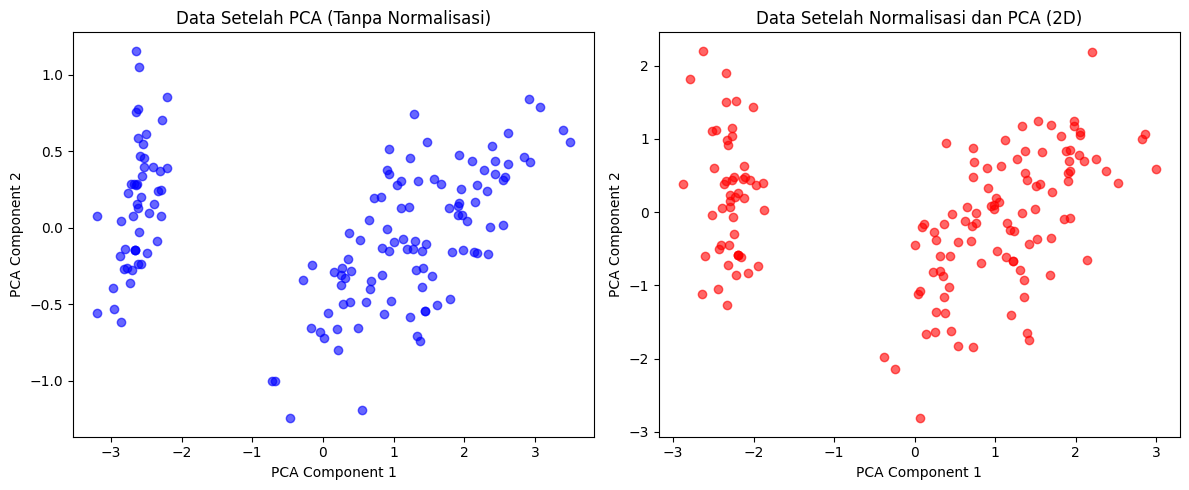

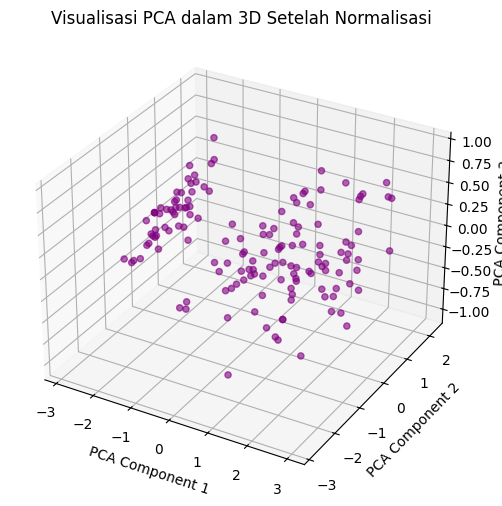

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# --- 3. Lakukan PCA (Reduksi Dimensi ke 2D) ---
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_normalized)

df_pca_2d_df = pd.DataFrame(df_pca_2d, columns=["PCA_1", "PCA_2"])

print("\n=== Data Setelah PCA (2 Komponen) ===")
print(df_pca_2d_df.head())

# --- 4. Lakukan PCA (Reduksi Dimensi ke 3D) ---
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_normalized)

df_pca_3d_df = pd.DataFrame(df_pca_3d, columns=["PCA_1", "PCA_2", "PCA_3"])

print("\n=== Data Setelah PCA (3 Komponen) ===")
print(df_pca_3d_df.head())

# --- 5. Visualisasi PCA Sebelum dan Setelah Normalisasi (2D) ---
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# PCA tanpa normalisasi
pca_raw = PCA(n_components=2)
df_pca_raw = pca_raw.fit_transform(df_cleaned[features])
df_pca_raw_df = pd.DataFrame(df_pca_raw, columns=["PCA_1", "PCA_2"])

ax[0].scatter(df_pca_raw_df["PCA_1"], df_pca_raw_df["PCA_2"], color='blue', alpha=0.6)
ax[0].set_xlabel("PCA Component 1")
ax[0].set_ylabel("PCA Component 2")
ax[0].set_title("Data Setelah PCA (Tanpa Normalisasi)")

# PCA setelah normalisasi
ax[1].scatter(df_pca_2d_df["PCA_1"], df_pca_2d_df["PCA_2"], color='red', alpha=0.6)
ax[1].set_xlabel("PCA Component 1")
ax[1].set_ylabel("PCA Component 2")
ax[1].set_title("Data Setelah Normalisasi dan PCA (2D)")

plt.tight_layout()
plt.show()


# --- 6. Visualisasi PCA dalam 3D ---
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca_3d_df["PCA_1"], df_pca_3d_df["PCA_2"], df_pca_3d_df["PCA_3"], color='purple', alpha=0.6)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("Visualisasi PCA dalam 3D Setelah Normalisasi")

plt.show()


### Tahap Modelling Clustering FCM

di sini saya akan melakukan Clustering Fuzzy C Means untuk data iris dengan pca 3d pada 2,3, 4 cluster



=== Fungsi Objektif Tiap Iterasi (PCA 2D, 3 Cluster) ===
Iterasi  1 -> Objective Function: 256.522254
Iterasi  2 -> Objective Function: 190.744950
Iterasi  3 -> Objective Function: 187.381394
Iterasi  4 -> Objective Function: 169.890488
Iterasi  5 -> Objective Function: 132.928662
Iterasi  6 -> Objective Function: 114.854178
Iterasi  7 -> Objective Function: 108.802392
Iterasi  8 -> Objective Function: 96.367037
Iterasi  9 -> Objective Function: 82.020306
Iterasi 10 -> Objective Function: 77.755108
Iterasi 11 -> Objective Function: 76.479490
Iterasi 12 -> Objective Function: 76.001065
Iterasi 13 -> Objective Function: 75.797966
Iterasi 14 -> Objective Function: 75.707358
Iterasi 15 -> Objective Function: 75.666509
Iterasi 16 -> Objective Function: 75.648132
Iterasi 17 -> Objective Function: 75.639902
Iterasi 18 -> Objective Function: 75.636233
Iterasi 19 -> Objective Function: 75.634602
Iterasi 20 -> Objective Function: 75.633879
Iterasi 21 -> Objective Function: 75.633559
Iterasi 22 

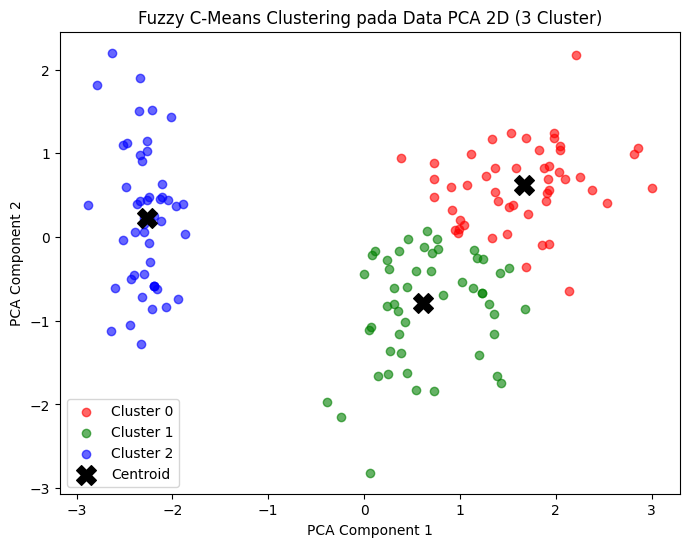


=== Fungsi Objektif Tiap Iterasi (PCA 3D, 2 Cluster) ===
Iterasi  1 -> Objective Function: 366.773574
Iterasi  2 -> Objective Function: 297.367289
Iterasi  3 -> Objective Function: 289.988754
Iterasi  4 -> Objective Function: 251.215301
Iterasi  5 -> Objective Function: 182.295170
Iterasi  6 -> Objective Function: 167.840429
Iterasi  7 -> Objective Function: 167.525187
Iterasi  8 -> Objective Function: 167.518512
Iterasi  9 -> Objective Function: 167.518088

=== Hasil Clustering Fuzzy C-Means pada PCA 3D (2 Cluster) ===
      PCA_1     PCA_2     PCA_3  Cluster_2  Cluster_3  Cluster_4
0 -2.341461  0.428850  0.127414          1          2          1
1 -2.294942  0.232097  0.039289          1          2          1
2 -2.400554 -0.451256 -0.060123          1          2          1
3 -2.320692 -0.721880 -0.113965          1          2          1
4 -2.485917  0.601693 -0.022533          1          2          1


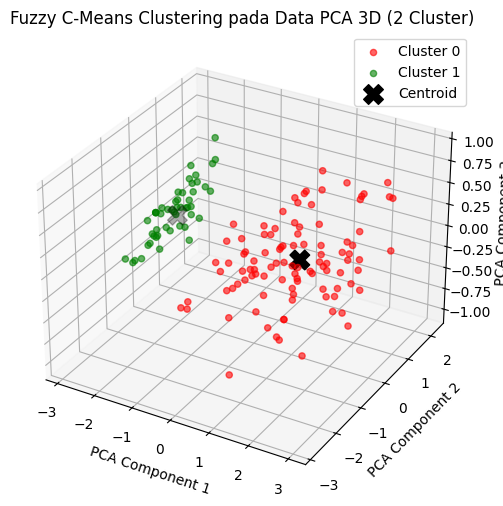


=== Fungsi Objektif Tiap Iterasi (PCA 3D, 3 Cluster) ===
Iterasi  1 -> Objective Function: 266.813815
Iterasi  2 -> Objective Function: 198.613957
Iterasi  3 -> Objective Function: 196.154832
Iterasi  4 -> Objective Function: 183.547017
Iterasi  5 -> Objective Function: 152.524807
Iterasi  6 -> Objective Function: 131.125017
Iterasi  7 -> Objective Function: 122.724122
Iterasi  8 -> Objective Function: 107.095605
Iterasi  9 -> Objective Function: 94.804818
Iterasi 10 -> Objective Function: 92.067776
Iterasi 11 -> Objective Function: 91.336654
Iterasi 12 -> Objective Function: 91.113332
Iterasi 13 -> Objective Function: 91.035899
Iterasi 14 -> Objective Function: 91.007094
Iterasi 15 -> Objective Function: 90.996100
Iterasi 16 -> Objective Function: 90.991876
Iterasi 17 -> Objective Function: 90.990252
Iterasi 18 -> Objective Function: 90.989629
Iterasi 19 -> Objective Function: 90.989390
Iterasi 20 -> Objective Function: 90.989299

=== Hasil Clustering Fuzzy C-Means pada PCA 3D (3 Clu

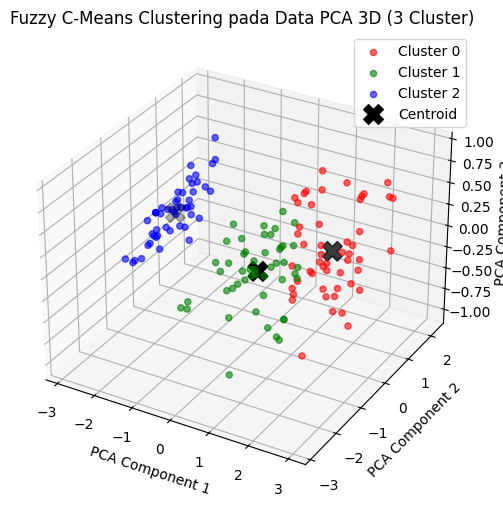


=== Fungsi Objektif Tiap Iterasi (PCA 3D, 4 Cluster) ===
Iterasi  1 -> Objective Function: 203.694926
Iterasi  2 -> Objective Function: 147.048387
Iterasi  3 -> Objective Function: 136.756984
Iterasi  4 -> Objective Function: 106.278503
Iterasi  5 -> Objective Function: 80.851086
Iterasi  6 -> Objective Function: 72.830354
Iterasi  7 -> Objective Function: 69.399499
Iterasi  8 -> Objective Function: 67.925298
Iterasi  9 -> Objective Function: 67.295983
Iterasi 10 -> Objective Function: 67.042438
Iterasi 11 -> Objective Function: 66.946399
Iterasi 12 -> Objective Function: 66.910335
Iterasi 13 -> Objective Function: 66.896315
Iterasi 14 -> Objective Function: 66.890544
Iterasi 15 -> Objective Function: 66.888022
Iterasi 16 -> Objective Function: 66.886861
Iterasi 17 -> Objective Function: 66.886307
Iterasi 18 -> Objective Function: 66.886036
Iterasi 19 -> Objective Function: 66.885901
Iterasi 20 -> Objective Function: 66.885833

=== Hasil Clustering Fuzzy C-Means pada PCA 3D (4 Cluster

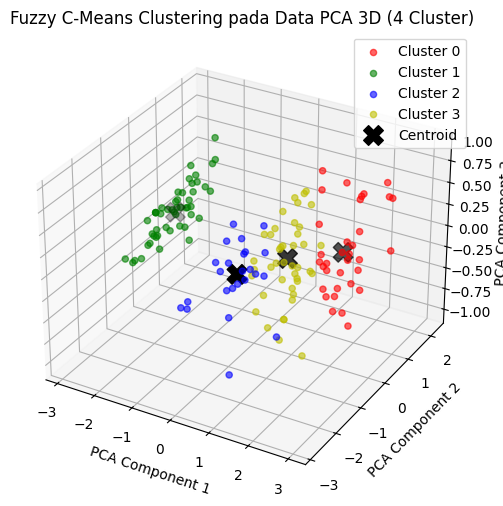

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# --- 1. Fuzzy C-Means Clustering pada PCA 2D (3 Cluster) ---
data_2d = df_pca_2d_df[["PCA_1", "PCA_2"]].values.T  # shape: (features, samples)

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_2d, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Cetak nilai fungsi objektif setiap iterasi
print("\n=== Fungsi Objektif Tiap Iterasi (PCA 2D, 3 Cluster) ===")
for idx, val in enumerate(jm):
    print(f"Iterasi {idx+1:2d} -> Objective Function: {val:.6f}")

# Ambil cluster (dengan derajat keanggotaan tertinggi)
cluster_labels = np.argmax(u, axis=0)
df_pca_2d_df["Cluster"] = cluster_labels

print("\n=== Hasil Clustering Fuzzy C-Means pada PCA 2D (3 Cluster) ===")
print(df_pca_2d_df.head())

# Visualisasi hasil clustering PCA 2D
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
for cluster in range(n_clusters):
    clustered_data = df_pca_2d_df[df_pca_2d_df["Cluster"] == cluster]
    plt.scatter(clustered_data["PCA_1"], clustered_data["PCA_2"], color=colors[cluster], label=f"Cluster {cluster}", alpha=0.6)

# Tambahkan Centroid dalam bentuk "X"
plt.scatter(cntr[:, 0], cntr[:, 1], color='black', marker='X', s=200, label="Centroid")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Fuzzy C-Means Clustering pada Data PCA 2D (3 Cluster)")
plt.legend()
plt.show()


# --- 2. Fuzzy C-Means Clustering pada PCA 3D (2, 3, dan 4 Cluster) ---
cluster_counts = [2, 3, 4]

for k in cluster_counts:
    data_3d = df_pca_3d_df[["PCA_1", "PCA_2", "PCA_3"]].values.T  # shape: (features, samples)

    # Fuzzy C-Means Clustering
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data_3d, c=k, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
    )

    # Cetak nilai fungsi objektif setiap iterasi
    print(f"\n=== Fungsi Objektif Tiap Iterasi (PCA 3D, {k} Cluster) ===")
    for idx, val in enumerate(jm):
        print(f"Iterasi {idx+1:2d} -> Objective Function: {val:.6f}")

    # Ambil cluster (label berdasarkan derajat keanggotaan maksimum)
    cluster_labels = np.argmax(u, axis=0)
    df_pca_3d_df[f"Cluster_{k}"] = cluster_labels

    print(f"\n=== Hasil Clustering Fuzzy C-Means pada PCA 3D ({k} Cluster) ===")
    print(df_pca_3d_df.head())

    # Visualisasi hasil clustering PCA 3D
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['r', 'g', 'b', 'y']
    for cluster in range(k):
        clustered_data = df_pca_3d_df[df_pca_3d_df[f"Cluster_{k}"] == cluster]
        ax.scatter(clustered_data["PCA_1"], clustered_data["PCA_2"], clustered_data["PCA_3"],
                   color=colors[cluster], label=f"Cluster {cluster}", alpha=0.6)

    # Tambahkan Centroid dalam bentuk "X"
    ax.scatter(cntr[:, 0], cntr[:, 1], cntr[:, 2], color='black', marker='X', s=200, label="Centroid")

    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")
    ax.set_title(f"Fuzzy C-Means Clustering pada Data PCA 3D ({k} Cluster)")
    ax.legend()
    plt.show()
